# Descriptive Statistics

## Calculating Descriptive Statistics

In [1]:
import math 
import statistics
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
x = [8.0, 1, 2.5, 4, 28.0]
x_with_nan = [8.0, 1, 2.5, math.nan, 4, 28.0]
print(x)
print(x_with_nan)

[8.0, 1, 2.5, 4, 28.0]
[8.0, 1, 2.5, nan, 4, 28.0]


In [5]:
#membuat dua array numpy (y dan y_with_nan) dan sua series pandas (z dan z_with_nan)
y, y_with_nan = np.array(x), np.array(x_with_nan)
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
print(y)
print(y_with_nan)
print(z_with_nan)

[ 8.   1.   2.5  4.  28. ]
[ 8.   1.   2.5  nan  4.  28. ]
0     8.0
1     1.0
2     2.5
3     NaN
4     4.0
5    28.0
dtype: float64


## Measures od Central Tendency

### Mean

In [6]:
mean = sum(x)/len(x)
mean

8.7

In [7]:
#menerapkan fungsi statistics built in python:
mean_ = statistics.mean(x)
print(mean_)

8.7


In [8]:
mean_ = statistics.mean(x_with_nan)
print(mean_)

nan


In [9]:
#menggunakan numpy
mean_ = np.mean(y)
mean_

8.7

In [10]:
mean_ = y.mean()
mean_

8.7

In [11]:
print(np.mean(y_with_nan))
print(y_with_nan.mean())

nan
nan


In [13]:
#mengabaikan nilai nan
np.nanmean(y_with_nan)

8.7

In [14]:
#menggunakan pd.series
mean_ = z.mean()
mean_

8.7

In [15]:
z_with_nan.mean()

8.7

### Weighted Mean

In [16]:
x = [8.0, 1, 2.5, 4, 28.0]
w = [0.1, 0.2, 0.3, 0.25, 0.15]

wmean = sum(w[i] * x[i] for i in range(len(x))) / sum(w)
print(wmean)

wmean = sum(x_ * w_ for (x_, w_) in zip (x,w)) / sum(w)
print(wmean)

6.95
6.95


In [18]:
#menggunakan numpy

y, z, w = np.array(x), pd.Series(x), np.array(w)
wmean = np.average(y, weights=w)
print(wmean)

wmean = np.average(z, weights=w)
print(wmean)

6.95
6.95


In [19]:
(w*y).sum() / w.sum()

6.95

### Harmonic Mean

In [20]:
hmean = len(x) / sum(1 / item for item in x)
hmean

2.7613412228796843

In [21]:
hmean = statistics.harmonic_mean(x)
hmean

2.7613412228796843

In [22]:
scipy.stats.hmean(y)

2.7613412228796843

In [23]:
scipy.stats.hmean(z)

2.7613412228796843

### Geometric Mean

In [24]:
gmean = 1

for item in x:
    gmean *= item
    
gmean **= 1 / len(x)
gmean

4.677885674856041

In [25]:
scipy.stats.gmean(y)

4.67788567485604

In [26]:
scipy.stats.gmean(z)

4.67788567485604

### Median

In [27]:
n = len(x)
if n % 2:
    median_ = sorted(x)[round(0.5*(n-1))]
else:
    x_ord, index = sorted(x), round(0.5*n)
    median_ = 0.5 * (x_ord[index-1] + x_ord[index])
median_

4

In [31]:
print(x)
statistics.median_low(x[:-1])

[8.0, 1, 2.5, 4, 28.0]


2.5

In [34]:
statistics.median_high(x[:-1])

4

In [36]:
#kasus nan
print(statistics.median(x_with_nan))
print(statistics.median_low(x_with_nan))
print(statistics.median_high(x_with_nan))

6.0
4
8.0


In [37]:
median = np.median(y)
print(median)

4.0


In [38]:
median = np.median(y[:-1])
print(median)

3.25


### Mode

In [39]:
u = [2, 3, 2, 8, 12]
v = [12, 15, 12, 15, 21, 15, 12]

mode = max((u.count(item), item) for item in set(u))[1]
mode

2

In [40]:
mode = statistics.mode(u)
mode

2

In [42]:
u, v = np.array(u), np.array(v)
mode = scipy.stats.mode(u)
mode

ModeResult(mode=array([2]), count=array([2]))

In [43]:
mode = scipy.stats.mode(v)
mode

ModeResult(mode=array([12]), count=array([3]))

In [46]:
print(mode.mode)
print(mode.count)

[12]
[3]


In [47]:
#pandas mampu mengabaikan nilai nan secara default
u, v, w = pd.Series(u), pd.Series(v), pd.Series([2,2, math.nan])
print(u.mode())
print(v.mode())
print(w.mode())

0    2
dtype: int32
0    12
1    15
dtype: int32
0    2.0
dtype: float64


## Measures of Variability

### Variance

In [48]:
n = len(x)

mean = sum(x) / n
var= sum((item - mean)**2 for item in x) / (n-1)
var

123.19999999999999

In [49]:
var = statistics.variance(x)
var

123.2

In [50]:
var_ = np.var(y, ddof = 1)
var_

123.19999999999999

In [51]:
var_ = y.var(ddof = 1)
var_

123.19999999999999

### Standard Deviation

In [52]:
std = var_ ** 0.5
std

11.099549540409285

In [53]:
std = statistics.stdev(x)
std

11.099549540409287

**numpy:**

In [54]:
#mengabaikan nanm dalam numpy
np.std(y, ddof = 1)

11.099549540409285

In [55]:
y.std(ddof = 1)

11.099549540409285

**pandas:**

In [56]:
z.std(ddof = 1)

11.099549540409285

### Skewness

In [58]:
x = [8.0, 1, 2.5, 4, 28.0]
n = len(x)

mean_ = sum (x) / n
var_ = sum((item - mean_)**2 for item in x) / (n - 1)
std_ = var_ ** 0.5

skew_ = (sum((item - mean)**3 for item in x) * n / ((n-1) * (n-2) * std_**3))
skew_

1.9470432273905929

In [60]:
sy, y_with_nan = np.array(x), np.array(x_with_nan)
scipy.stats.skew(y, bias = False)

1.9470432273905927

In [61]:
scipy.stats.skew(y_with_nan, bias=False)

nan

**pandas:**

In [62]:
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
z.skew()

1.9470432273905924

In [63]:
z_with_nan.skew()

1.9470432273905924

### Percentiles

In [64]:
x = [-5.0, -1.1, 0.1, 2.0, 8.0, 12.8, 21.0, 25.8, 41.0]
print(statistics.quantiles(x, n=2))
print(statistics.quantiles(x, n=4, method='inclusive'))

[8.0]
[0.1, 8.0, 21.0]


In [65]:
#mencari persentil ke-5 an ke-95
y = np.array(x)
np.percentile(y, 5)

-3.44

In [66]:
np.percentile(y, 95)

34.919999999999995

In [67]:
np.percentile(y, [25, 50, 75])

array([ 0.1,  8. , 21. ])

In [68]:
np.median(y)

8.0

In [69]:
#mengabaikan nan
y_with_nan = np.insert(y, 2, np.nan)
y_with_nan

array([-5. , -1.1,  nan,  0.1,  2. ,  8. , 12.8, 21. , 25.8, 41. ])

In [70]:
np.nanpercentile(y_with_nan, [25, 50, 75])

array([ 0.1,  8. , 21. ])

In [71]:
np.quantile(y, 0.05)

-3.44

In [72]:
np.quantile(y, 0.95)

34.919999999999995

In [73]:
np.quantile(y, [0.25, 0.5, 0.75])

array([ 0.1,  8. , 21. ])

In [74]:
np.nanquantile(y_with_nan, [0.25, 0.5, 0.75])

array([ 0.1,  8. , 21. ])

**pandas:**

In [75]:
z, z_with_nan = pd.Series(y), pd.Series(y_with_nan)
z.quantile(0.05)

-3.44

In [76]:
z.quantile(0.95)

34.919999999999995

In [77]:
z.quantile([0.25, 0.5, 0.75])

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

In [78]:
z_with_nan.quantile([0.25, 0.5, 0.75])

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

### Ranges

In [79]:
np.ptp(y)

46.0

In [80]:
np.ptp(z)

46.0

In [81]:
np.ptp(y_with_nan)

nan

In [82]:
np.ptp(z_with_nan)

nan

**menggunakan max dan min**

In [83]:
np.amax(y) - np.amin(y)

46.0

In [84]:
np.nanmax(y_with_nan) - np.nanmin(y_with_nan)

46.0

In [85]:
y.max() - y.min()

46.0

In [87]:
z.max() - z.min()

46.0

In [88]:
z_with_nan.max() - z_with_nan.min()

46.0

**Interquartile range**

In [92]:
quartile = np.quantile(y, [0.25, 0.75])
quartile[1] - quartile[0]

20.9

In [94]:
quartiles = z.quantile([0.25, 0.75])
quartiles[0.75] - quartiles[0.25]

20.9

## Summary of Descriptive Statistics

In [95]:
result = scipy.stats.describe(y, ddof=1, bias=False)
result

DescribeResult(nobs=9, minmax=(-5.0, 41.0), mean=11.622222222222222, variance=228.75194444444446, skewness=0.9249043136685094, kurtosis=0.14770623629658886)

In [96]:
result.nobs

9

In [97]:
result.minmax[0]

-5.0

In [98]:
result.minmax[1]

41.0

In [99]:
result.mean

11.622222222222222

In [100]:
result.variance

228.75194444444446

In [101]:
result.skewness

0.9249043136685094

In [102]:
result.kurtosis

0.14770623629658886

In [103]:
z.describe()

count     9.000000
mean     11.622222
std      15.124548
min      -5.000000
25%       0.100000
50%       8.000000
75%      21.000000
max      41.000000
dtype: float64

## Measures of Correlation Between Pairs of Data

In [104]:
x = list(range(-10, 11))
y = [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 
    12, 14]
x_, y_ = np.array(x), np.array(y)
x_, y_ = pd.Series(x_), pd.Series(y_)

### Covariance

In [105]:
n = len(x)
mean_x, mean_y = sum(x) / n, sum(y) / n
cov_xy = (sum((x[k] - mean_x) * (y[k] - mean_y) for k in range(n))
         / (n-1))
cov_xy

19.95

**Numpy:**

In [106]:
cov_matrix = np.cov(x_, y_)
cov_matrix

array([[38.5       , 19.95      ],
       [19.95      , 13.91428571]])

In [107]:
x_.var(ddof=1)

38.5

In [108]:
y_.var(ddof=1)

13.914285714285711

In [109]:
cov_xy = cov_matrix[0, 1]
cov_xy

19.95

In [110]:
cov_xy = cov_matrix[1,0]
cov_xy

19.95

**pandas:**

In [115]:
cov_xy = x_.cov(y_)
cov_xy

19.95

In [116]:
cov_xy = y_.cov(x_)
cov_xy

19.95

### Correlation Coefficient

In [120]:
var_x = sum((item - mean_x)**2 for item in x) / (n-1)
var_y = sum((item - mean_y)**2 for item in y) / (n-1)
std_x, std_y = var_x ** 0.5, var_y ** 0.5
r = cov_xy / (std_x * std_y)
r

0.861950005631606

In [122]:
r, p = scipy.stats.pearsonr(x_, y_)
r

0.8619500056316061

In [123]:
p

5.122760847201135e-07

**numpy:**

In [124]:
corr_matrix = np.corrcoef(x_, y_)
corr_matrix

array([[1.        , 0.86195001],
       [0.86195001, 1.        ]])

In [125]:
r = corr_matrix[0, 1]
print(r)
r=corr_matrix[1,0]
print(r)

0.8619500056316061
0.861950005631606


In [126]:
scipy.stats.linregress(x_, y_)

LinregressResult(slope=0.5181818181818181, intercept=5.714285714285714, rvalue=0.861950005631606, pvalue=5.122760847201164e-07, stderr=0.06992387660074979, intercept_stderr=0.4234100995002589)

In [127]:
result = scipy.stats.linregress(x_, y_)
r = result.rvalue
r

0.861950005631606

**Pandas:**

In [133]:
r = x_.corr(y_)
print(r)
r = y_.corr(x_)
print(r)

0.8619500056316061
0.861950005631606


## Working with 2D Data

**Axes**

In [134]:
a = np.array([[1, 1, 1],
             [2, 3, 1],
             [4, 9, 2],
             [8, 27, 4],
             [16, 1, 1]])
a

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [135]:
np.mean(a)

5.4

In [136]:
a.mean()

5.4

In [137]:
np.median(a)

2.0

In [138]:
a.var(ddof=1)

53.40000000000001

**axis = 0**

In [139]:
np.mean(a, axis = 0)

array([6.2, 8.2, 1.8])

In [140]:
a.mean(axis=0)

array([6.2, 8.2, 1.8])

**axis = 1**

In [141]:
np.mean(a, axis = 1)

array([ 1.,  2.,  5., 13.,  6.])

In [142]:
a.mean(axis = 1)

array([ 1.,  2.,  5., 13.,  6.])

**fungsi lain**

In [143]:
np.median(a, axis = 0)

array([4., 3., 1.])

In [145]:
np.median(a, axis = 1)

array([1., 2., 4., 8., 1.])

In [146]:
a.var(axis=0, ddof=1)

array([ 37.2, 121.2,   1.7])

In [147]:
a.var(axis=1, ddof=1)

array([  0.,   1.,  13., 151.,  75.])

**statistik SciPy:**

In [148]:
scipy.stats.gmean(a)

array([4.        , 3.73719282, 1.51571657])

In [149]:
scipy.stats.gmean(a, axis = 0)

array([4.        , 3.73719282, 1.51571657])

In [150]:
scipy.stats.gmean(a, axis = 1)

array([1.        , 1.81712059, 4.16016765, 9.52440631, 2.5198421 ])

In [152]:
#untuk seluruh dataset
scipy.stats.gmean(a, axis = None)

2.829705017016332

In [153]:
scipy.stats.describe(a, axis=None, ddof=1, bias=False)

DescribeResult(nobs=15, minmax=(1, 27), mean=5.4, variance=53.40000000000001, skewness=2.264965290423389, kurtosis=5.212690982795767)

In [155]:
scipy.stats.describe(a, ddof=1, bias=False)

DescribeResult(nobs=5, minmax=(array([1, 1, 1]), array([16, 27,  4])), mean=array([6.2, 8.2, 1.8]), variance=array([ 37.2, 121.2,   1.7]), skewness=array([1.32531471, 1.79809454, 1.71439233]), kurtosis=array([1.30376344, 3.14969121, 2.66435986]))

In [156]:
scipy.stats.describe(a, axis=1, ddof=1, bias=False)

DescribeResult(nobs=3, minmax=(array([1, 1, 2, 4, 1]), array([ 1,  3,  9, 27, 16])), mean=array([ 1.,  2.,  5., 13.,  6.]), variance=array([  0.,   1.,  13., 151.,  75.]), skewness=array([0.        , 0.        , 1.15206964, 1.52787436, 1.73205081]), kurtosis=array([-3. , -1.5, -1.5, -1.5, -1.5]))

**dot notation**

In [158]:
result = scipy.stats.describe(a, axis=1, ddof=1, bias=False)
result.mean

array([ 1.,  2.,  5., 13.,  6.])

### DataFrames

In [159]:
row_names = ['first', 'second', 'third', 'fourth', 'fifth']
col_names = ['A', 'B', 'C']
df = pd.DataFrame(a, index=row_names, columns=col_names)
df

,A,B,C
first,1,1,1
second,2,3,1
third,4,9,2
fourth,8,27,4
fifth,16,1,1


In [162]:
df.mean()

A    6.2
B    8.2
C    1.8
dtype: float64

In [161]:
df.var()

A     37.2
B    121.2
C      1.7
dtype: float64

**axis = 1**

In [163]:
df.mean(axis = 1)

first      1.0
second     2.0
third      5.0
fourth    13.0
fifth      6.0
dtype: float64

In [164]:
df.var(axis = 1)

first       0.0
second      1.0
third      13.0
fourth    151.0
fifth      75.0
dtype: float64

In [165]:
df['A']

first      1
second     2
third      4
fourth     8
fifth     16
Name: A, dtype: int32

In [166]:
df['A'].mean()

6.2

In [168]:
df['A'].var()

37.20000000000001

In [169]:
df.values

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [170]:
df.to_numpy()

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [171]:
df.describe()

,A,B,C
count,5.00000,5.000000,5.00000
mean,6.20000,8.200000,1.80000
std,6.09918,11.009087,1.30384
min,1.00000,1.000000,1.00000
25%,2.00000,1.000000,1.00000
50%,4.00000,3.000000,1.00000
75%,8.00000,9.000000,2.00000
max,16.00000,27.000000,4.00000


In [172]:
df.describe().at['mean', 'A']

6.2

In [173]:
df.describe().at['50%', 'B']

3.0

### Visualizing Data

In [174]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

**Box Plots**

In [175]:
np.random.seed(seed=0)
x = np.random.randn(1000)
y = np.random.randn(100)
z = np.random.randn(10)

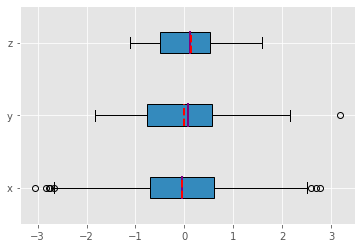

In [178]:
fig, ax = plt.subplots()
ax.boxplot((x, y, z), vert=False,
          showmeans = True,
          meanline = True,
          labels=('x', 'y', 'z'),
          patch_artist=True,
          medianprops= {'linewidth': 2, 'color':'purple'},
          meanprops={'linewidth': 2, 'color':'red'})
plt.show()

**Histogram**

In [179]:
hist, bin_edges = np.histogram(x, bins=10)
print(hist)

[  9  20  70 146 217 239 160  86  38  15]


In [180]:
bin_edges

array([-3.04614305, -2.46559324, -1.88504342, -1.3044936 , -0.72394379,
       -0.14339397,  0.43715585,  1.01770566,  1.59825548,  2.1788053 ,
        2.75935511])

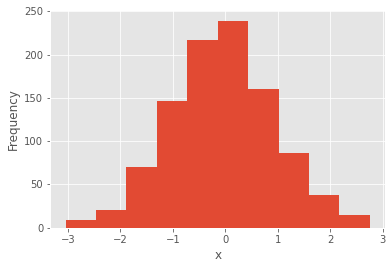

In [182]:
fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=False)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

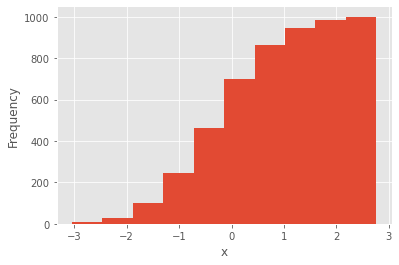

In [183]:
fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=True)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

**Pie Chart**

In [184]:
x, y, z = 128, 256, 1024

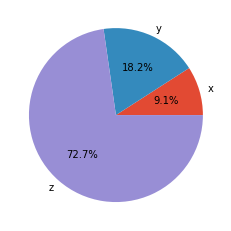

In [185]:
fig, ax = plt.subplots()
ax.pie((x, y, z), labels=('x', 'y', 'z'), autopct='%1.1f%%')
plt.show()

**Bar Charts**

In [187]:
x = np.arange(21)
y = np.random.randint(21, size = 21)
err = np.random.randn(21)

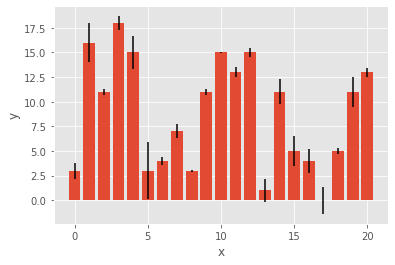

In [188]:
fig, ax = plt.subplots()
ax.bar(x, y, yerr=err)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

**X-Y Plots**

In [194]:
x = np.arange(21)
y = 5 + 2 * x + 2 * np.random.randn(21)
slope, intercept, r, *__ = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

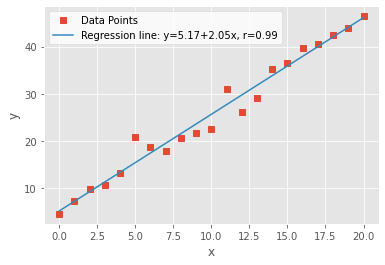

In [196]:
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data Points')
ax.plot(x, intercept + slope * x, label = line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()

**Heatmaps**

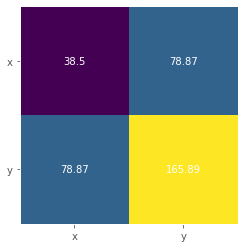

In [201]:
matrix = np.cov(x,y).round(decimals=2)
fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0,1), ticklabels=('x', 'y'))
ax.set_ylim(1.5, -0.5)
for i in range(2):  
    for j in range(2): 
        ax.text(j, i, matrix[i, j], ha='center',
                va='center', color='w')
plt.show()
        

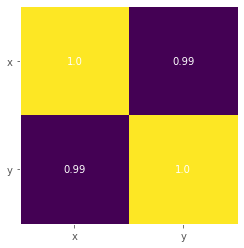

In [202]:
matrix = np.corrcoef(x,y).round(decimals=2)
fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0,1), ticklabels=('x', 'y'))
ax.set_ylim(1.5, -0.5)
for i in range(2):  
    for j in range(2): 
        ax.text(j, i, matrix[i, j], ha='center',
                va='center', color='w')
plt.show()